# Module 5 - Modern Portfolio Theory

   ### Welcome to the Answer notebook for Module 5 ! 
Make sure that you've submitted the module 4 notebook and unlocked Module 5 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("AJANTPHARM.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AJANTPHARM,EQ,2017-05-15,1616.30,1610.00,1643.40,1601.00,1636.0,1633.50,1626.20,80998,1.317191e+08,8331,24643,30.42
1,AJANTPHARM,EQ,2017-05-16,1633.50,1632.50,1643.45,1610.00,1638.0,1634.25,1626.38,49236,8.007667e+07,4863,13831,28.09
2,AJANTPHARM,EQ,2017-05-17,1634.25,1620.50,1668.00,1620.50,1655.0,1654.35,1651.81,210648,3.479504e+08,12022,131496,62.42
3,AJANTPHARM,EQ,2017-05-18,1654.35,1640.25,1663.95,1621.85,1639.0,1633.40,1633.59,81511,1.331553e+08,5489,37544,46.06
4,AJANTPHARM,EQ,2017-05-19,1633.40,1640.00,1681.20,1621.50,1663.7,1670.25,1655.61,189657,3.139979e+08,8043,89768,47.33


In [8]:
df['return']=df['Close Price'].pct_change()

In [9]:
mean_daily_returns = df['return'].mean()
stand_daily_return=df['return'].std()

In [10]:
print('mean daily return and standard deviation is' ,mean_daily_returns,stand_daily_return)

mean daily return and standard deviation is -0.0006900451794528804 0.020924825327700465


In [11]:
annualised_return = round(mean_daily_returns * 252,2)
annualised_stdev = round( stand_daily_return* np.sqrt(252),2)

In [12]:
print('annual mean daily return and standard deviation is' ,annualised_return,annualised_stdev)

annual mean daily return and standard deviation is -0.17 0.33


###### 5.2 Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [13]:
data1=pd.read_csv("ADANIPOWER.csv",parse_dates=['Date'])
data1.set_index('Date',inplace=True)
data1=data1['Close Price']
data2=pd.read_csv("JUBLFOOD.csv",parse_dates=['Date'])
data2.set_index('Date',inplace=True)
data2=data2['Close Price']
data3=pd.read_csv("AJANTPHARM.csv",parse_dates=['Date'])
data3.set_index('Date',inplace=True)
data3=data3['Close Price']
data4=pd.read_csv("RELINFRA.csv",parse_dates=['Date'])
data4.set_index('Date',inplace=True)
data4=data4['Close Price']
data5=pd.read_csv("AMARAJABAT.csv",parse_dates=['Date'])
data5.set_index('Date',inplace=True)
data5=data5['Close Price']


In [14]:
data=pd.DataFrame({'ADANI':data1,'JUBLI':data2,'RELINFRA':data4,'AJANTA':data3,'AMARAJ':data5})

In [15]:
data

,ADANI,JUBLI,RELINFRA,AJANTA,AMARAJ
Date,,,,,
2017-05-15,30.25,1025.45,605.40,1633.50,933.40
2017-05-16,32.85,1050.65,611.05,1634.25,924.70
2017-05-17,33.10,1049.05,605.25,1654.35,937.70
2017-05-18,31.90,1019.35,578.65,1633.40,912.10
2017-05-19,32.40,1018.10,569.55,1670.25,895.75
2017-05-22,31.45,1030.30,555.25,1677.95,877.70
2017-05-23,29.85,993.15,526.25,1676.80,874.20
2017-05-24,28.00,976.45,493.70,1657.45,835.65
2017-05-25,28.65,1014.95,497.15,1616.15,837.45


In [16]:
data.sort_index(inplace=True)

In [17]:
returns = data.pct_change()


In [18]:
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()


In [19]:
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)

In [20]:
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)


In [21]:
print('Portfolio expected annualised return is[' ,portfolio_return, ']  and volatility is' ,portfolio_std_dev)

Portfolio expected annualised return is[ -0.11 ]  and volatility is 0.28


##### 5.3 Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.


In [30]:
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

In [31]:
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [42]:
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []
selected=['ADANI','JUBLI','RELINFRA','AJANTA','AMARAJ']

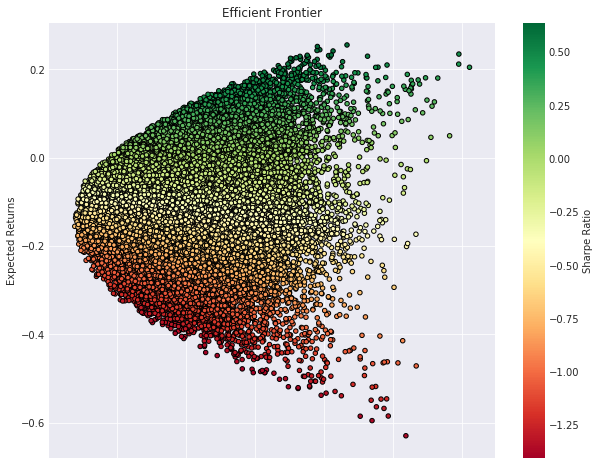

In [43]:
num_assets = 5
num_portfolios = 50000
np.random.seed(101)
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}
for counter,symbol in enumerate(selected):
    portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
df = pd.DataFrame(portfolio)
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]
df = df[column_order]
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

##### 5.4 Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest. 

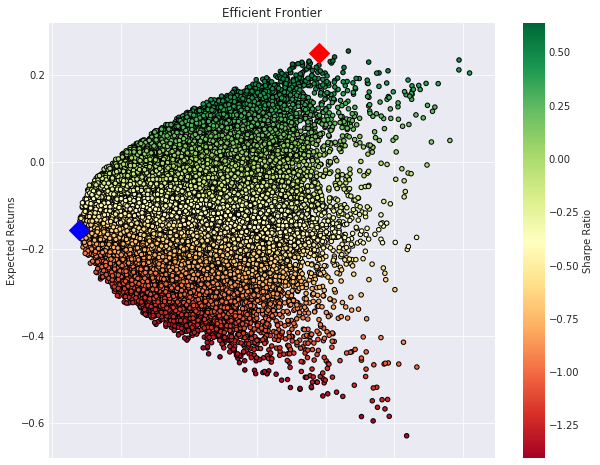

In [44]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()